## Alura Bike empresa de mobilidade urbana(aluguel de bicicletas). Realizamos um estudo para entender a dinâmica do negócio.

### Utilizamos uma biblioteca de dados pública Bike sharing data set. Data set já tratado para analisarmos

# O tempo e a temperatura interfere no número de bicicletas alugadas?

In [1]:
#carregando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#carregando os dados
dados = pd.read_csv('Bicicletas.csv')

In [3]:
# imprimindo as primeiras linhas do data set
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [4]:
#arquivo possui 731 linhas e 3 colunas
dados.shape

(731, 3)

Text(0.5, 0, 'temperatura')

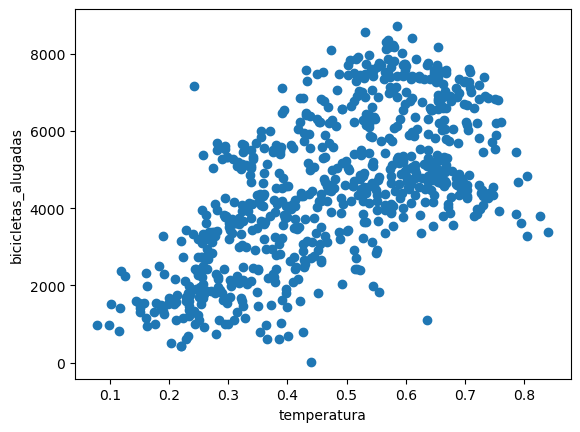

In [5]:
#plotando as variáveis para verificar a correlação
plt.scatter(dados['temperatura'], dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')

([<matplotlib.axis.XTick at 0x1cada7db760>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

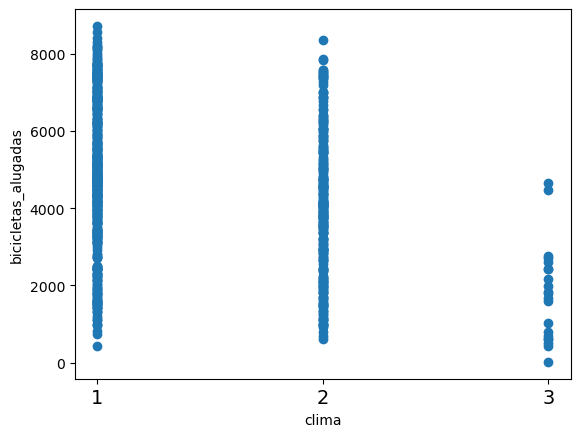

In [6]:
#plotando as variáveis para verificar a correlação
plt.scatter(dados['clima'], dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
indice=[1,2,3]
plt.xticks(indice,fontsize=14)

In [7]:
#atribuindo os dados em uma variável
y = dados['bicicletas_alugadas'].values

In [8]:
#atribuindo os dados em uma variável
X = dados[['clima', 'temperatura']].values
print(X)

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 ...
 [2.       0.2424  ]
 [1.       0.2317  ]
 [2.       0.223487]]


In [9]:
#normalizando os dados/todos os valores estarão entre 0 e 1.
X = X/np.amax(X,axis=0)
print(X)

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]


In [10]:
#normalizando os dados/todos os valores estarão entre 0 e 1.
ymax = np.amax(y)
y = y/ymax
print(y)

[0.11303649 0.09192105 0.15480835 0.17925178 0.18361258 0.18430112
 0.17328437 0.11005279 0.09433096 0.15159513 0.14493918 0.13334863
 0.16134955 0.16307092 0.14321781 0.13816846 0.11475786 0.07837962
 0.18935047 0.2211384  0.17707138 0.11257746 0.11315125 0.16249713
 0.22779435 0.05806748 0.04946064 0.13392242 0.12600413 0.12577462
 0.17225155 0.15607069 0.1751205  0.17787468 0.19600643 0.11533165
 0.18625201 0.19646546 0.17557953 0.18418637 0.17649759 0.20036723
 0.16892357 0.18235024 0.21953179 0.20828552 0.24271288 0.28402571
 0.33589626 0.1876291  0.20794124 0.12703695 0.1663989  0.21999082
 0.20736745 0.16766123 0.22595823 0.27564838 0.16593987 0.2124168
 0.24489328 0.193367   0.22308928 0.23835208 0.06942851 0.21482672
 0.24477852 0.21700711 0.07149415 0.22687629 0.24466376 0.27736975
 0.23479458 0.23594216 0.25154923 0.31489557 0.37170071 0.35770025
 0.28356667 0.23835208 0.3101905  0.24340142 0.21402341 0.25361487
 0.28643562 0.19428506 0.23272894 0.27828781 0.17626807 0.19336

### Repassaremos a entrada para o algoritimo, clima e temperatura multiplicadas pelo seu devido peso e somadas ao final.

In [11]:
#definiremos uma função de sigmoid para ativação da rede neural
def sigmoid(Soma):
    return 1/(1+np.exp(-Soma))


In [12]:
#definiremos uma função de relu para ativação da rede neural
def relu(Soma):
    return np.maximum(0,Soma)

In [13]:
#estruturando as camadas da rede neural
arquitetura = [
    {"dim_entrada": 2, "dim_saida": 50, "ativacao": "relu"},
    {"dim_entrada": 50, "dim_saida": 1, "ativacao": "sigmoid"},
]

In [14]:
#definindo o peso para utilizar na rede neural/utilizaremos pesos aleatórios
def inicia_camadas(arquitetura, seed = 99):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

In [15]:
#função que faz propagação em uma camada/multiplicação de matrizes
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual
    
    # selecção da função de ativação
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Renato\AppData\Local\Temp\ipykernel_6940\1110043557.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if ativacao is "relu":
C:\Users\Renato\AppData\Local\Temp\ipykernel_6940\1110043557.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif ativacao is "sigmoid":


In [16]:
#função que irá chamar diversas vezes a mesma função
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salca os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

In [17]:
#gerando os pesos da rede
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [18]:
y_estimado[0,0]

0.5255890483427204

In [19]:
y_estimado[0,0]*ymax

4579.982967258466

In [20]:
y[0]*ymax

985.0000000000001

### Ajustando a rede neural, utilizaremos a Retropropagação/corrigiremos os pesos

In [30]:
#Função para atualizar os pesos
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

    return valores_parametros;

In [31]:
#implementando uma função de custo
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)

In [32]:
#adicionando gradiente na função atualiza pesos
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # numero de exemplos
    #m = Y.shape[1]
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        b_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes

In [33]:
# definindo uma função sigmoid retro para saida
# definindo uma função relu retro para saida
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [34]:
#implementando a função de retropropagacao/ativacao
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao is "relu":
        func_ativacao_retro = relu_retro
    elif ativacao is "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Renato\AppData\Local\Temp\ipykernel_6940\1173502296.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if ativacao is "relu":
C:\Users\Renato\AppData\Local\Temp\ipykernel_6940\1173502296.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif ativacao is "sigmoid":


In [35]:
#criando uma função para treinar a rede neural
def treino(X, Y,X_teste,Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
   
    
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede - Foward propagation
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        
        Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
        historia_custo_teste.append(custo_teste)
        
        
        # Retropropagação - Backpropagation
        gradientes = retropropagacao_total(Y_predito, Y, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 50 == 0):
            
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))
            
            
    return valores_parametros, historia_custo, historia_custo_teste

In [36]:
#dividir a base de dados em treino e teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.43, random_state=42)

In [37]:
#treinar a rede neural chamando a função treino
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))), 
                                                                  np.transpose(X_teste), np.transpose(y_teste.reshape((y_teste.shape[0], 1))), 
                                                                  arquitetura, 20000, 0.01)

Iteração: 00000 - custo: 0.69396 
Iteração: 00050 - custo: 0.69246 
Iteração: 00100 - custo: 0.69136 
Iteração: 00150 - custo: 0.69054 
Iteração: 00200 - custo: 0.68991 
Iteração: 00250 - custo: 0.68939 
Iteração: 00300 - custo: 0.68894 
Iteração: 00350 - custo: 0.68852 
Iteração: 00400 - custo: 0.68812 
Iteração: 00450 - custo: 0.68773 
Iteração: 00500 - custo: 0.68735 
Iteração: 00550 - custo: 0.68700 
Iteração: 00600 - custo: 0.68667 
Iteração: 00650 - custo: 0.68635 
Iteração: 00700 - custo: 0.68605 
Iteração: 00750 - custo: 0.68575 
Iteração: 00800 - custo: 0.68545 
Iteração: 00850 - custo: 0.68515 
Iteração: 00900 - custo: 0.68485 
Iteração: 00950 - custo: 0.68455 
Iteração: 01000 - custo: 0.68424 
Iteração: 01050 - custo: 0.68394 
Iteração: 01100 - custo: 0.68363 
Iteração: 01150 - custo: 0.68333 
Iteração: 01200 - custo: 0.68302 
Iteração: 01250 - custo: 0.68271 
Iteração: 01300 - custo: 0.68239 
Iteração: 01350 - custo: 0.68208 
Iteração: 01400 - custo: 0.68176 
Iteração: 0145

Iteração: 12100 - custo: 0.64285 
Iteração: 12150 - custo: 0.64284 
Iteração: 12200 - custo: 0.64283 
Iteração: 12250 - custo: 0.64282 
Iteração: 12300 - custo: 0.64281 
Iteração: 12350 - custo: 0.64280 
Iteração: 12400 - custo: 0.64279 
Iteração: 12450 - custo: 0.64278 
Iteração: 12500 - custo: 0.64277 
Iteração: 12550 - custo: 0.64276 
Iteração: 12600 - custo: 0.64275 
Iteração: 12650 - custo: 0.64274 
Iteração: 12700 - custo: 0.64273 
Iteração: 12750 - custo: 0.64272 
Iteração: 12800 - custo: 0.64271 
Iteração: 12850 - custo: 0.64271 
Iteração: 12900 - custo: 0.64270 
Iteração: 12950 - custo: 0.64269 
Iteração: 13000 - custo: 0.64268 
Iteração: 13050 - custo: 0.64267 
Iteração: 13100 - custo: 0.64266 
Iteração: 13150 - custo: 0.64266 
Iteração: 13200 - custo: 0.64265 
Iteração: 13250 - custo: 0.64264 
Iteração: 13300 - custo: 0.64263 
Iteração: 13350 - custo: 0.64263 
Iteração: 13400 - custo: 0.64262 
Iteração: 13450 - custo: 0.64261 
Iteração: 13500 - custo: 0.64260 
Iteração: 1355

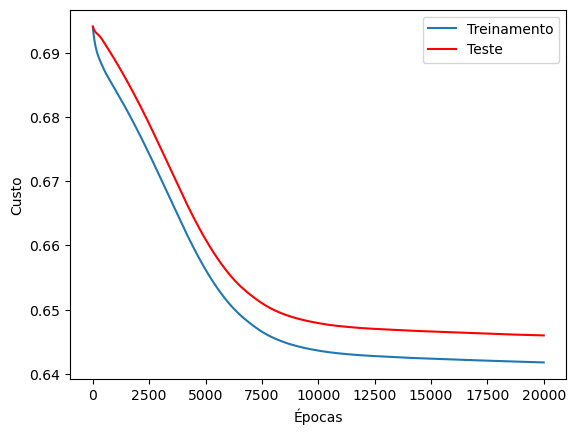

In [38]:
#plotando os resultados
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento','Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

# Realizando as previsões

In [39]:
# Previsão
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

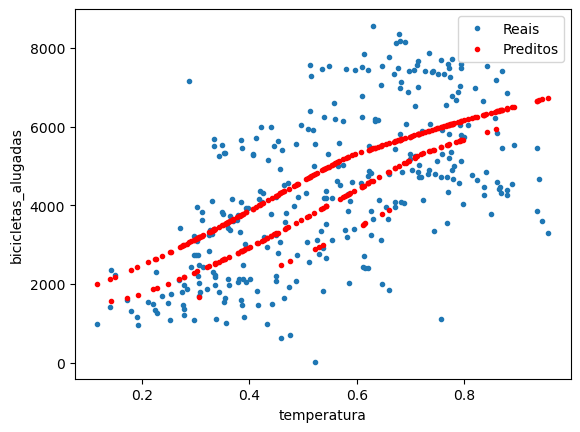

In [40]:
#plotando a previsão, bicicletas alugadas vs temperatura
plt.plot(np.transpose(X_teste)[1],ymax*y_teste,'.')
plt.plot(np.transpose(X_teste)[1],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')
plt.show()

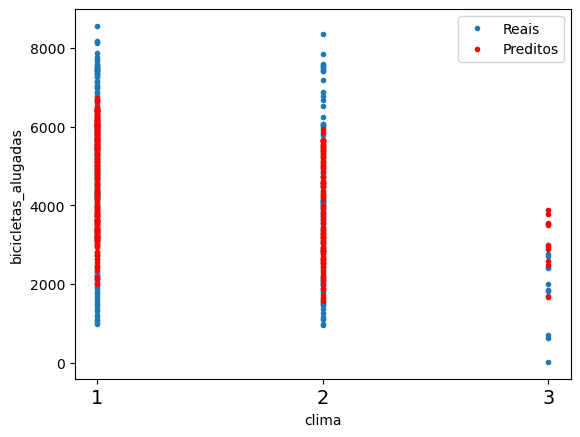

In [41]:
#plotando a previsão, bicicletas alugadas vs clima
plt.plot(3*np.transpose(X_teste)[0],ymax*y_teste,'.')
plt.plot(3*np.transpose(X_teste)[0],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()